In [4]:
import numpy as np
import matplotlib.pyplot as plt
class MDP:
    def __init__(self):
        self.states = ['s0', 's1', 's2']
        self.actions = ['a0', 'a1']

        # Transition probabilities (next_state, probability)
        self.transitions = {
            's0': {
                'a0': [('s1', 0.8), ('s2', 0.2)],
                'a1': [('s0', 1.0)]
            },
            's1': {
                'a0': [('s0', 0.5), ('s2', 0.5)],
                'a1': [('s1', 1.0)]
            },
            's2': {
                'a0': [('s0', 1.0)]
            }
        }

        # Rewards for each (state, action, next_state) pair
        self.rewards = {
            ('s0', 'a0', 's1'): 5,
            ('s0', 'a0', 's2'): 10,
            ('s0', 'a1', 's0'): 1,
            ('s1', 'a0', 's0'): 3,
            ('s1', 'a0', 's2'): 2,
            ('s1', 'a1', 's1'): 0,
            ('s2', 'a0', 's0'): 4,
        }


In [5]:
class MDPWithExpectedRewards(MDP):
    def __init__(self):
        super().__init__()

    def expected_reward(self, state, action):
        expected_reward = 0
        if state in self.transitions and action in self.transitions[state]:
            for next_state, transition_prob in self.transitions[state][action]:
                reward = self.rewards.get((state, action, next_state), 0)
                expected_reward += transition_prob * reward
        return expected_reward

# Create MDP instance with expected rewards calculation
mdp_expected_rewards = MDPWithExpectedRewards()

# Example usage
state = 's0'
action = 'a0'
expected_reward_value = mdp_expected_rewards.expected_reward(state, action)
print(f"Expected Reward E[R | S={state}, A={action}] = {expected_reward_value}")


Expected Reward E[R | S=s0, A=a0] = 6.0


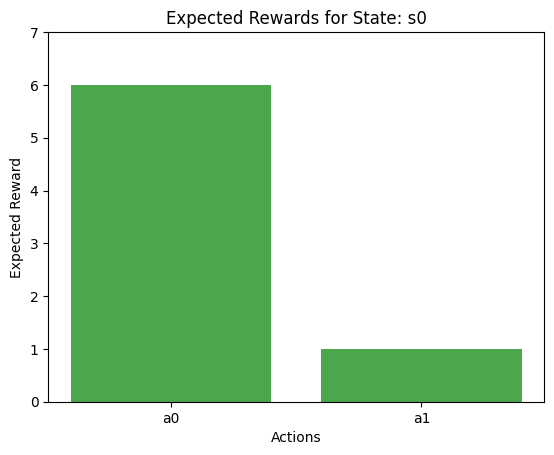

In [6]:
def plot_expected_rewards(mdp_instance, state):
    expected_rewards = {}

    for action in mdp_instance.actions:
        expected_rewards[action] = mdp_instance.expected_reward(state, action)

    actions = list(expected_rewards.keys())
    rewards = list(expected_rewards.values())

    plt.bar(actions, rewards, color='g', alpha=0.7)
    plt.xlabel('Actions')
    plt.ylabel('Expected Reward')
    plt.title(f'Expected Rewards for State: {state}')
    plt.ylim(0, max(rewards) + 1)
    plt.show()

# Example usage
plot_expected_rewards(mdp_expected_rewards, 's0')
